# Assignment 9: Making Maps with Cartopy

## 1) Plot data from NARR
NARR is NCEP’s North American Regional Reanalysis, a widely used product for studying the weather and climate of the continental US. The data is available from NOAA’s Earth System Research Laboratory via OPeNDAP, meaing that xarray can open the data “remotely” without downloading a file.

For this problem, you should open this geopential height file:

https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/pressure/hgt.201810.nc

And this precipitation file:

https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/monolevel/apcp.2018.nc

Your goal is to make a map that looks like the one below. It shows total precipitation on Oct. 15, 2018 in blue, plus contours of the 500 mb geopotential surface.

Hint: examine the dataset variables and attirbutes carefully in order to determine the projection of the data.

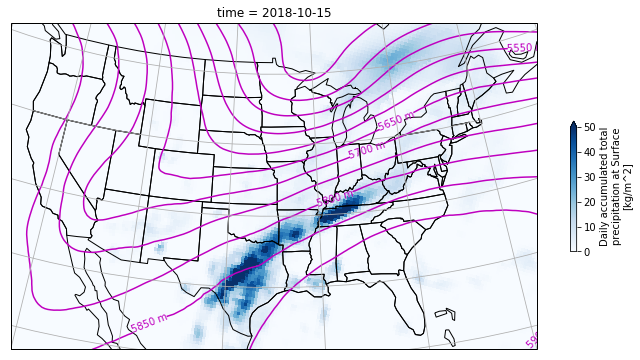

In [2]:
#Import necessary packages 
import cartopy.crs as ccrs
import cartopy
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mt
import numpy as np
import pandas as pd
import datetime

In [3]:
# Load data for geopotential and precipitation
gp = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/pressure/hgt.201810.nc', drop_variables=['time_bnds'])
pr = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/monolevel/apcp.2018.nc', drop_variables=['time_bnds'])

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'hgt' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'apcp' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [4]:
#Selecting the October 15, 2018
hgt_500 = gp.sel(time='2018-10-15', level = '500', method='nearest').load() #Select for rigth time and level
prcp_15 = pr.apcp.sel(time='2018-10-15', method='nearest').load()
hgt_500 

<xarray.Dataset>
Dimensions:            (y: 277, x: 349)
Coordinates:
    time               datetime64[ns] 2018-10-15
    level              float32 500.0
  * y                  (y) float32 0.0 3.246e+04 ... 8.927e+06 8.96e+06
  * x                  (x) float32 0.0 3.246e+04 ... 1.126e+07 1.13e+07
    lat                (y, x) float32 1.0 1.104 1.208 ... 46.93 46.64 46.35
    lon                (y, x) float32 -145.5 -145.3 -145.1 ... -2.644 -2.57
Data variables:
    Lambert_Conformal  int32 -2147483647
    hgt                (y, x) float32 5.858e+03 5.857e+03 5.857e+03 ... nan nan
Attributes: (12/17)
    _NCProperties:                   version=1|netcdflibversion=4.4.1.1|hdf5l...
    Conventions:                     CF-1.2
    centerlat:                       50.0
    centerlon:                       -107.0
    comments:                        
    institution:                     National Centers for Environmental Predi...
    ...                              ...
    title:                           Daily NARR
    history:                         created Sat Mar 26 07:07:59 MDT 2016 by ...
    dataset_title:                   NCEP North American Regional Reanalysis ...
    references:                      https://www.esrl.noaa.gov/psd/data/gridd...
    source:                          http://www.emc.ncep.noaa.gov/mmb/rreanl/...
    DODS_EXTRA.Unlimited_Dimension:  time

In [5]:
#Copy projection information from dataset.
proj = ccrs.LambertConformal(
    central_longitude=-107,
    central_latitude=50,
    false_easting=5632642.22547,
    false_northing=4612545.65137,
    standard_parallels=(50, 50)
)

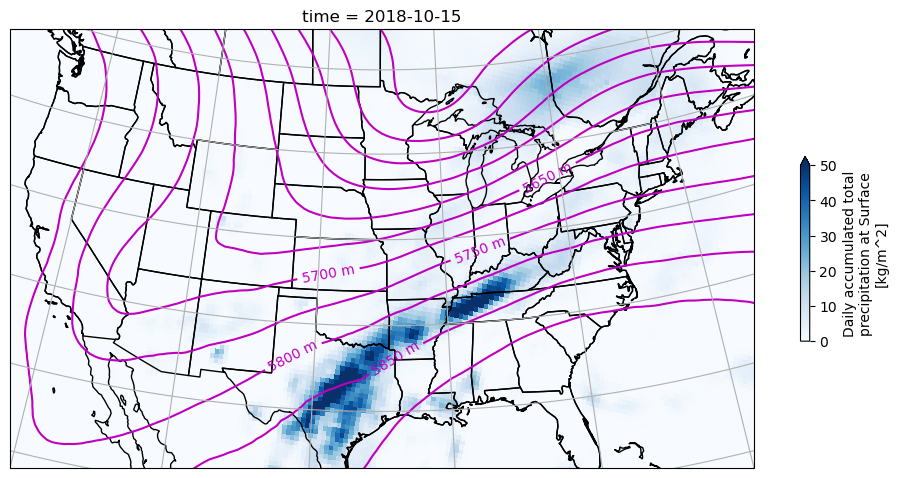

In [15]:
#Plot Figure
entral_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat)) #this looked most similar but lamber look good too
ax.set_extent(extent)
precip = prcp_15.plot(ax=ax, vmin = 0, vmax = 50, cmap = 'Blues', transform = proj, cbar_kwargs={'shrink': 0.4})
con = ax.contour(hgt_500.x, hgt_500.y, hgt_500.hgt, 20, colors = 'm', transform = proj)
ax.clabel(con, inline=1, fmt="%4.0f m")
ax.coastlines()
ax.add_feature(cartopy.feature.STATES, edgecolor='k')
ax.gridlines()
plt.show()

## 2) Antarctic Sea Ice
Download this file and then use it to plot the concentration of Antarctic Sea Ice on Aug. 7, 2017. Again, you will need to explore the file contents in order to determine the correct projection.


In [7]:
import xarray as xr
import pooch
url = 'https://polarwatch.noaa.gov/erddap/files/nsidcCDRiceSQsh1day/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc'
fname = pooch.retrieve(url, known_hash='19b74e7e97f1c0786da0c674c4d5e4af0da5b32e2fe8c66a8f1a8a9a1241e73c')
ds_ice = xr.open_dataset(fname, drop_variables='melt_onset_day_seaice_conc_cdr')
ds_ice 

<xarray.Dataset>
Dimensions:                     (time: 1, ygrid: 332, xgrid: 316)
Coordinates:
  * time                        (time) datetime64[ns] 2017-08-07T12:00:00
  * ygrid                       (ygrid) float32 4.338e+06 ... -3.938e+06
  * xgrid                       (xgrid) float32 -3.938e+06 ... 3.938e+06
    latitude                    (ygrid, xgrid) float64 ...
    longitude                   (ygrid, xgrid) float64 ...
Data variables:
    projection                  |S1 ...
    seaice_conc_cdr             (time, ygrid, xgrid) float32 ...
    stdev_of_seaice_conc_cdr    (time, ygrid, xgrid) float32 ...
    qa_of_seaice_conc_cdr       (time, ygrid, xgrid) float32 ...
    goddard_merged_seaice_conc  (time, ygrid, xgrid) float32 ...
    goddard_nt_seaice_conc      (time, ygrid, xgrid) float32 ...
    goddard_bt_seaice_conc      (time, ygrid, xgrid) float32 ...
Attributes: (12/70)
    references:                             Comiso, J. C., and F. Nishio. 200...
    program:                                NOAA Climate Data Record Program
    cdr_variable:                           seaice_conc_cdr
    software_version_id:                    git@bitbucket.org:nsidc/seaice_cd...
    Metadata_Link:                          https://nsidc.org/api/dataset/met...
    product_version:                        v03r01
    ...                                     ...
    scaling_factor:                         1.0
    false_easting:                          0.0
    false_northing:                         0.0
    semimajor_radius:                       6378273.0
    semiminor_radius:                       6356889.449
    proj_units:                             meters

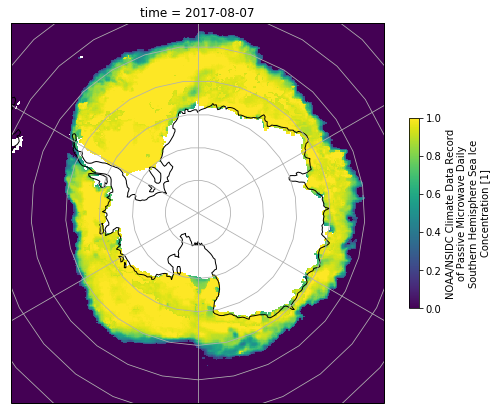

In [8]:
#Select dataset
si = ds_ice.seaice_conc_cdr.sel(time='2017-08-07', method='nearest')
si

<xarray.DataArray 'seaice_conc_cdr' (ygrid: 332, xgrid: 316)>
[104912 values with dtype=float32]
Coordinates:
    time       datetime64[ns] 2017-08-07T12:00:00
  * ygrid      (ygrid) float32 4.338e+06 4.312e+06 ... -3.912e+06 -3.938e+06
  * xgrid      (xgrid) float32 -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06
    latitude   (ygrid, xgrid) float64 ...
    longitude  (ygrid, xgrid) float64 ...
Attributes:
    valid_range:            [  0 100]
    long_name:              NOAA/NSIDC Climate Data Record of Passive Microwa...
    standard_name:          sea_ice_area_fraction
    units:                  1
    flag_values:            [-5 -4 -3 -2 -1]
    flag_meanings:          pole_hole lakes coastal land_mask missing_data
    datum:                  +ellps=urn:ogc:def:crs:EPSG::4326
    grid_mapping:           projection
    reference:              https://nsidc.org/api/dataset/metadata/v2/oai?ver...
    ancillary_variables:    stdev_of_seaice_conc_cdr qa_of_seaice_conc_cdr
    cell_methods:           time: mean (interval: 1 day)
    coverage_content_type:  physicalMeasurement
    ioos_category:          Ice Distribution

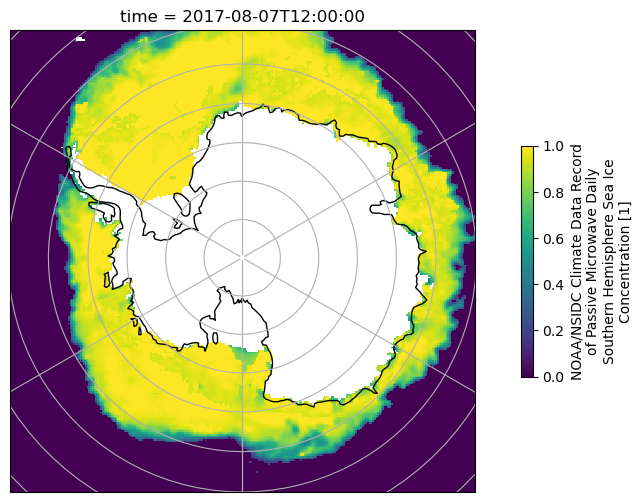

In [9]:
#South Polar Sterographic Projection 
proj = ccrs.SouthPolarStereo(0, -90)
plt.figure(figsize=(12, 6))
ax = plt.axes(projection = proj)
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
grd = ax.gridlines()
grd.ylocator = mt.FixedLocator(np.arange(-90,-40,5))
#Set over to get white color 
colors = plt.cm.get_cmap('viridis')
colors.set_over('w')
si.plot(vmin=0.0, vmax=1.0, cmap = colors, extend = 'neither', cbar_kwargs={'shrink': 0.5})
ax.coastlines(resolution = '110m')
plt.show()

## 3) Global USGS Earthquakes
Reload the file we explored in homework 5 using pandas

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

and use the data to recreate this map.

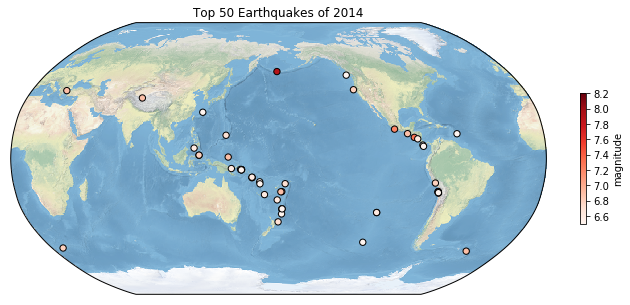

In [10]:
df = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv', parse_dates=['time'])
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [11]:
#50 Largest Earthquakes by arranging in order and slicing 
n50 = df.sort_values(['mag'], ascending=[False])[:50]
n50.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake


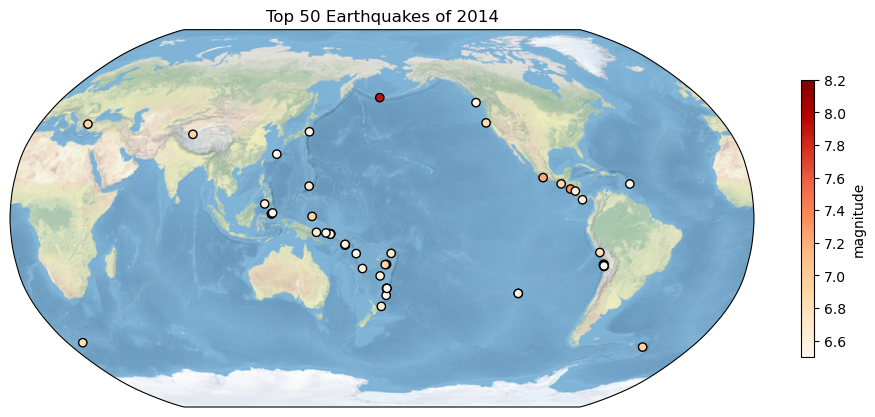

In [12]:
# Plot figure 
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 180))
ax.stock_img()
s = ax.scatter(n50['longitude'], n50['latitude'], c = n50['mag'], cmap = "OrRd", transform = ccrs.PlateCarree(), edgecolor = 'k')
plt.title('Top 50 Earthquakes of 2014')
plt.colorbar(s, shrink = 0.6, label = 'magnitude')
plt.show()